In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [20]:
K=8
death_ratio = np.array([0.00000000e+00, 3.36964689e-06, 2.19595034e-05, 4.49107573e-05,
               1.88422215e-04, 4.99762978e-04, 1.89895681e-03, 7.40632275e-03])

In [35]:
all_death = pd.read_csv("../data/orszagos_halott.csv", sep=',')[:755]
death_orig = np.array(all_death[181:181+180]["Hétnapos mozgóátlag"])

In [41]:
def get_inf_curve(filename, death = None, K= 8):
    df = pd.read_csv(filename, sep=',')
    inf_cols = [c for c in df.columns if c[0]=='I']
    Is = df.filter(inf_cols, axis=1)
    
    I = np.zeros((150, K, len(Is.columns)//K))
    for c in Is.columns:
        _,city,age = c.split("_")
        I[:,int(age), int(city)] = Is.loc[:, c]
    
    I = np.sum(I, axis=2)
    if type(death) != None:
        return np.sum(I*death, axis=1), Is.sum(axis=1)
    else:
        return Is.sum(axis=1)

def fit(x,y):
    min_ind = 0
    MIN = 1e12
    for shift in range(25):
        orig_shifted = x[shift:len(y)+25-(25-shift)]
        l2 = np.sqrt(np.sum((orig_shifted-y)**2))
        if l2 < MIN:
            MIN = l2
            min_ind = shift
    return min_ind, MIN

R0=1.84 ==> Optimal shift: 22 (l2 = 370.1737642149865)
R0=1.89 ==> Optimal shift: 24 (l2 = 401.6959461616061)
R0=1.95 ==> Optimal shift: 24 (l2 = 445.7281255186971)
R0=2.00 ==> Optimal shift: 24 (l2 = 501.77630040062024)


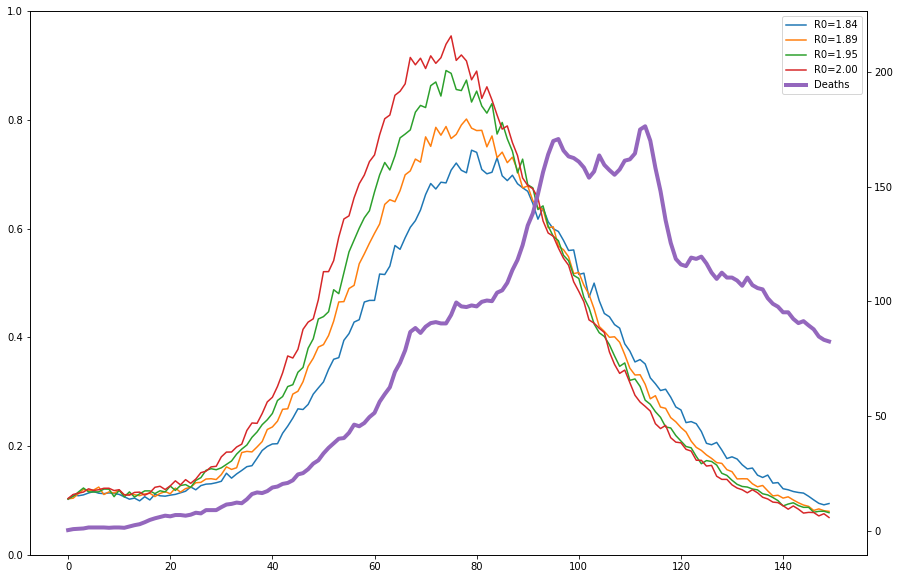

In [91]:
fig, axs = plt.subplots(1,1,figsize=(15,10))
ax = axs
ax2 = ax.twinx()
x = np.array(list(range(150)))

for i,R0 in zip(range(20)[16:], np.linspace(1.0, 2.0, 20)[16:]):
    #death, Is = get_inf_curve(f"../../output/R0_K2/{i}.txt", death = 0.5*np.ones(K))
    death, Is = get_inf_curve(f"../../output/R0_K2/{i}.txt", death = death_ratio*10)
    #ax.plot(Is, label=str(R0))
    ax2.plot(x, death, label=f"R0={R0:.2f}")
    
    shift, l2 = fit(death_orig, death)
    print(f"R0={R0:.2f} ==> Optimal shift: {shift} (l2 = {l2})")

lns1 = ax2.plot(x, death_orig[:len(x)], label="Deaths", linewidth=4)
plt.legend()

R0=1.74 ==> Optimal shift: 15 (l2 = 385.7316748960649)
R0=1.79 ==> Optimal shift: 19 (l2 = 373.62207711679235)
R0=1.84 ==> Optimal shift: 22 (l2 = 370.1737642149865)
R0=1.89 ==> Optimal shift: 24 (l2 = 401.6959461616061)
R0=1.95 ==> Optimal shift: 24 (l2 = 445.7281255186971)
R0=2.00 ==> Optimal shift: 24 (l2 = 501.77630040062024)


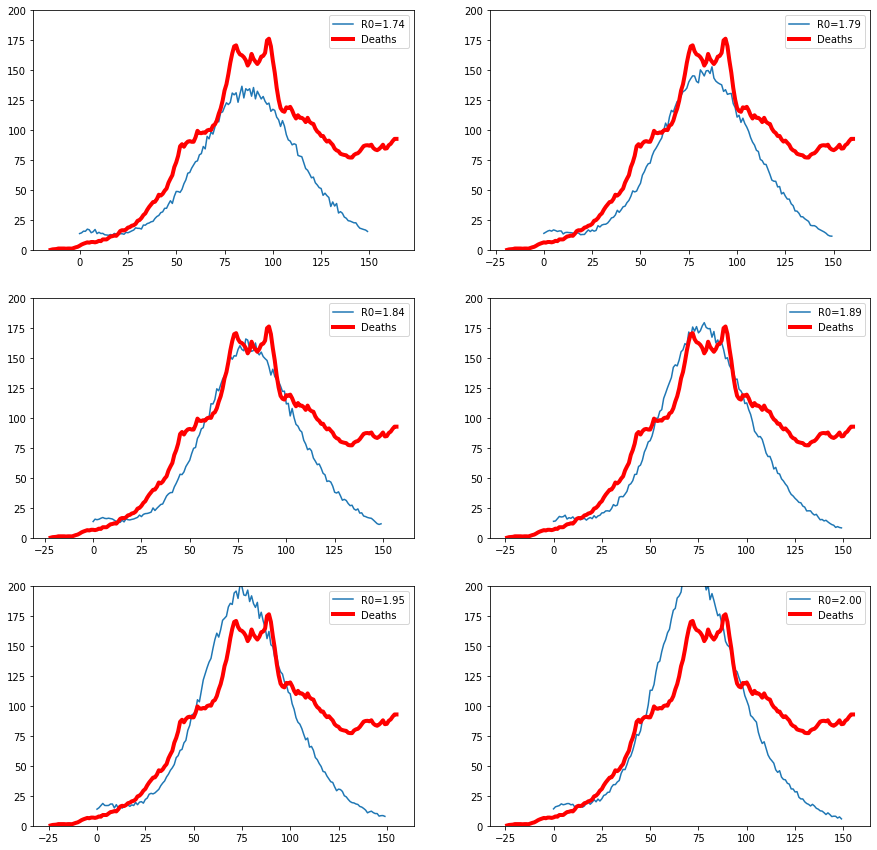

In [102]:
N,M = 3,2
fig, axs = plt.subplots(N,M,figsize=(15,15))
axs = [axs[i,j] for i in range(N) for j in range(M)]
lns = []
x = np.array(list(range(180)))
for i,R0,ax in zip(range(20)[20-N*M:], np.linspace(1.0, 2.0, 20)[20-N*M:], axs):
    death, Is = get_inf_curve(f"../../output/R0_K2/{i}.txt", death = death_ratio*10)
    ax.plot(x[:len(death)], death, label=f"R0={R0:.2f}")
    
    shift, l2 = fit(death_orig, death)
    print(f"R0={R0:.2f} ==> Optimal shift: {shift} (l2 = {l2})")

    ln = ax.plot(x-shift, death_orig, c = 'r', label="Deaths", linewidth=4)
    ax.set_ylim(0,200)
    ax.legend()